In [1]:
from parameters import *
from functions import *
from PDE_solutions import *

walks = 10000
dt =T/200
print(X0)
print(PDEProb)

[0, 2.5]
0.000851609120970076


In [2]:
R_in = np.sqrt(X0[0]**2 + X0[1]**2)
R_f = R

m = 5

R_list = np.linspace(R_in,R_f,m)

N_list = np.ones(m-1) * 3
N_list[0] = 14
N_list[1] = 10
N_list[2] = 7
N_list[3] = 5

# Splitting method

Checking dimensionality of H, Ns and Y.
Radiuses: [2.5   2.125 1.75  1.375 1.   ]
Walks per stage: [14. 10.  7.  5.]
Timestep: 0.01


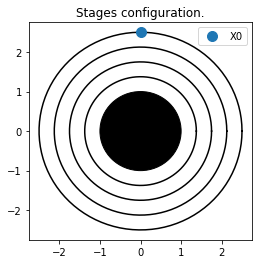


Splitting method starts...
Root:  0
Root:  1
Root:  2
Root:  3
Root:  4
Root:  5
Root:  6
Root:  7
Root:  8
Root:  9
Root:  10
Root:  11
Root:  12
Root:  13



Splitting method results:
	Estimated probability: 0.0010204081632653062
	Estimated variance: 0.000735910507482247
PDE result is:  0.000851609120970076


In [3]:
np.random.seed(SEED) #scipy is based on the numpy seed
H = np.zeros(R_list.shape[0]-1) #hits
Y = np.zeros(int(N_list[0]))
Y_SM, H_SM = SplittingMethod(X0, 0., 0.01, N_list, R_list, Y, H, 0, np.nan)
print('\n\n')
if H_SM is not np.nan:
    mean_SM, std = ComputeEstimatesSplittingMethod(Y_SM, N_list, PDEProb = PDEProb)

# Splitting method with balanced growth

Splitting method with balanced growth.

Radiuses: [2.5   2.125 1.75  1.375 1.   ]
Timestep: 0.01


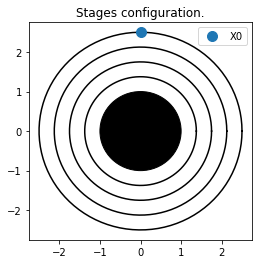


Pilot run with walks per stage:  [14. 10.  7.  5.]
Pilot run starts...
Pilot run terminated.
Pilot run results: 
	H = [5. 7. 6. 3.]
	p_i = [0.357 0.14  0.122 0.1  ] 
	N = [ 9 24 27 30]

Calling the splitting method.



Splitting method results:
	Estimated probability: 0.00012002743484224966
	Estimated variance: 4.5366106156800255e-05
PDE result is:  0.000851609120970076


In [4]:
Y_SM, H_SM, N_SM = SplittingMethodBalancedGrowth(X0, 0.01, R_list, N_list, T = 1, multiplier=1, verbose = 1, seed = SEED)
print('\n\n')
if H is not np.nan:
    mean_SM_BG, std = ComputeEstimatesSplittingMethod(Y_SM, N_SM, PDEProb)

# Error comparison

In [5]:
print('Splitting method (basic version) relative error:   ', np.abs(PDEProb - mean_SM)/PDEProb)
print('Splitting method (balanced growth) relative error: ', np.abs(PDEProb - mean_SM_BG)/PDEProb)

Splitting method (basic version) relative error:    0.1982118769500139
Splitting method (balanced growth) relative error:  0.8590580679719291


# Plot

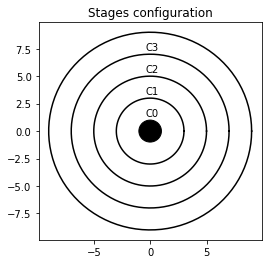

In [6]:
Rs = [3,5,7,9,1]
fig, ax = plt.subplots(figsize = [4,4])
for radius in Rs[:-1]:
    theta = np.linspace(0,2*np.pi,100)
    ax.plot(radius*np.cos(theta),radius*np.sin(theta),'k-')
circle = plt.Circle((0, 0), Rs[-1], color='k')
ax.add_artist(circle)
ax.set_title('Stages configuration')
ax.text(-0.4, 1.4, 'C0')
ax.text(-0.4, 3.4, 'C1')
ax.text(-0.4, 5.4, 'C2')
ax.text(-0.4, 7.4, 'C3')

plt.show()
fig.savefig('Stages_example.eps', format = 'eps')

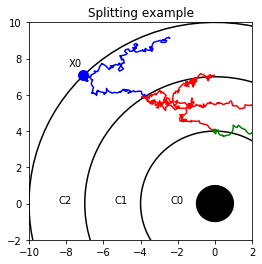

In [7]:
X0 = np.array([-10, 10])/np.sqrt(2)
Rs = [4,7,10,1]
fig, ax = plt.subplots(figsize = [4,4])
for radius in Rs[:-1]:
    theta = np.linspace(0,2*np.pi,100)
    ax.plot(radius*np.cos(theta),radius*np.sin(theta),'k-')
circle = plt.Circle((0, 0), Rs[-1], color='k')
ax.add_artist(circle)
ax.set_title('Splitting example')
ax.text(-2.4, 0, 'C0')
ax.text(-5.4, 0, 'C1')
ax.text(-8.4, 0, 'C2')
ax.text(X0[0]-0.8,X0[1]+0.5,'X0')
plt.xlim([-10,2])
plt.ylim([-2,10])
ax.plot(X0[0],X0[1],'b.', ms = 20, label='X0')

np.random.seed(24)
X,_ = StageWalk_Plot(X0,10,7,0,0.01)
X = X.T
ax.plot(X[0,:],X[1,:],'b-')
np.random.seed(220)
X,_ = StageWalk_Plot(X0,10,7,0,0.01)
X = X.T
ax.plot(X[0,:],X[1,:],'b-')


X01 = X[:,-1]
np.random.seed(20)
X,_ = StageWalk_Plot(X01.T,7,4,0,0.01)
X = X.T
ax.plot(X[0,:],X[1,:],'r-')
np.random.seed(21)
X,_ = StageWalk_Plot(X01.T,7,4,0,0.01)
X = X.T
ax.plot(X[0,:],X[1,:],'r-')
np.random.seed(100)
X,_ = StageWalk_Plot(X01.T,7,4,0,0.01)
X = X.T
ax.plot(X[0,:],X[1,:],'r-') 

X02 = X[:,-1]
X,_ = StageWalk_Plot(X02.T,4,1,0,0.01)
X = X.T
ax.plot(X[0,:],X[1,:],'g-')  

plt.show()
fig.savefig('splitting_example.eps', format = 'eps')

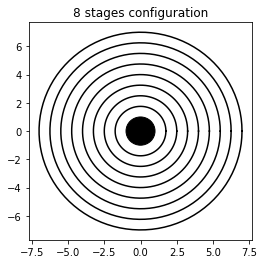

In [8]:
R_in = 7
R_f = R

m = 9

Rs = np.linspace(R_in,R_f,m)
fig, ax = plt.subplots(figsize = [4,4])
for radius in Rs[:-1]:
    theta = np.linspace(0,2*np.pi,100)
    ax.plot(radius*np.cos(theta),radius*np.sin(theta),'k-')
circle = plt.Circle((0, 0), Rs[-1], color='k')
ax.add_artist(circle)
ax.set_title('8 stages configuration')
plt.show()
fig.savefig('8_stages.eps', format = 'eps')